In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import glob
from sklearn.model_selection import train_test_split

In [2]:
with_mask= glob.glob('with_mask 1\with_mask 1/*.jpg')
without_mask =glob.glob('without_mask\without_mask/*.jpg')

In [3]:
len(with_mask)

1696

In [4]:
len(without_mask)

1792

In [6]:
classes = {0: 'with_mask', 1: 'without_mask'}

In [7]:
images = []
labels = []

for i in with_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in without_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

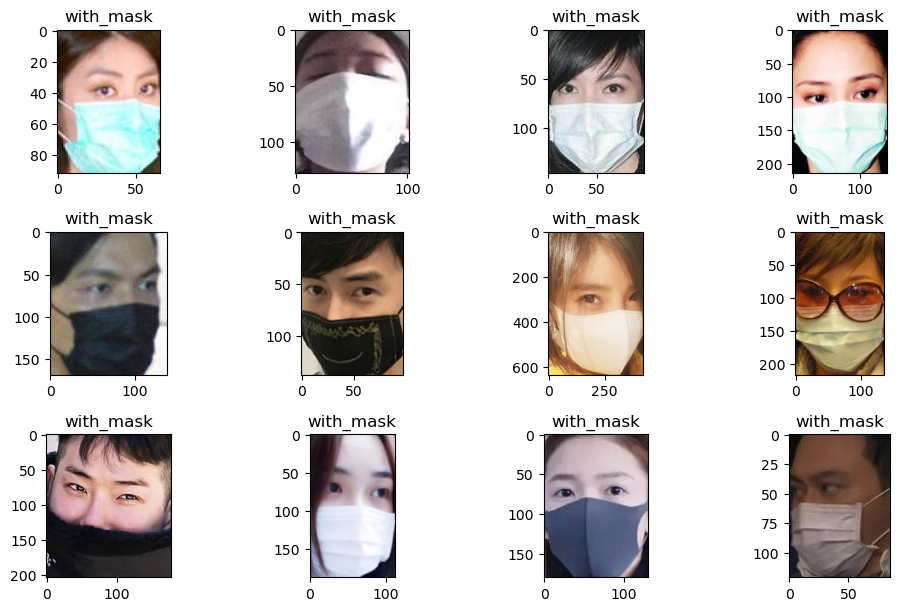

In [8]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [9]:
images,labels = shuffle(images,labels)

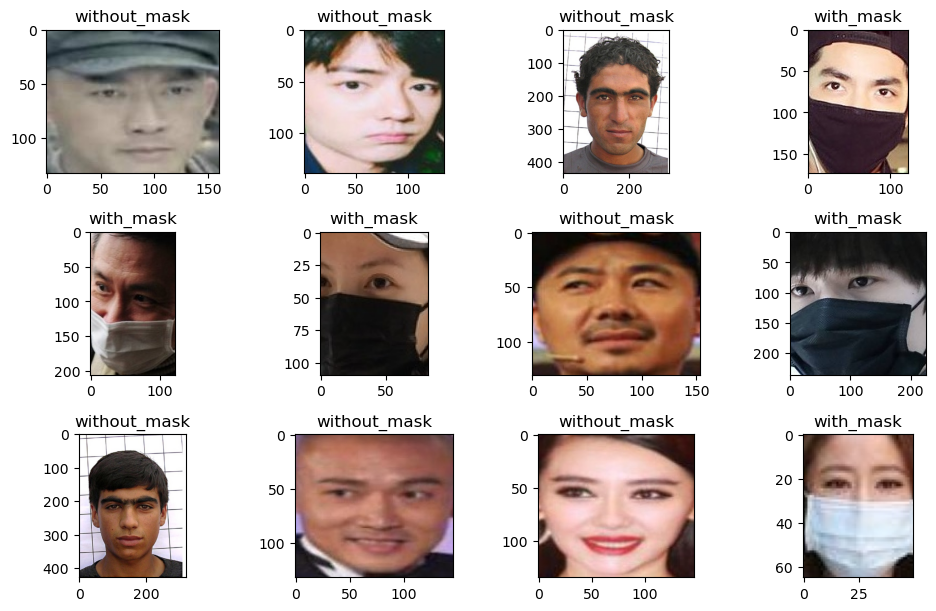

In [10]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [11]:
X = []

for i in images:
    X.append(resize(i, (64,64,3)))

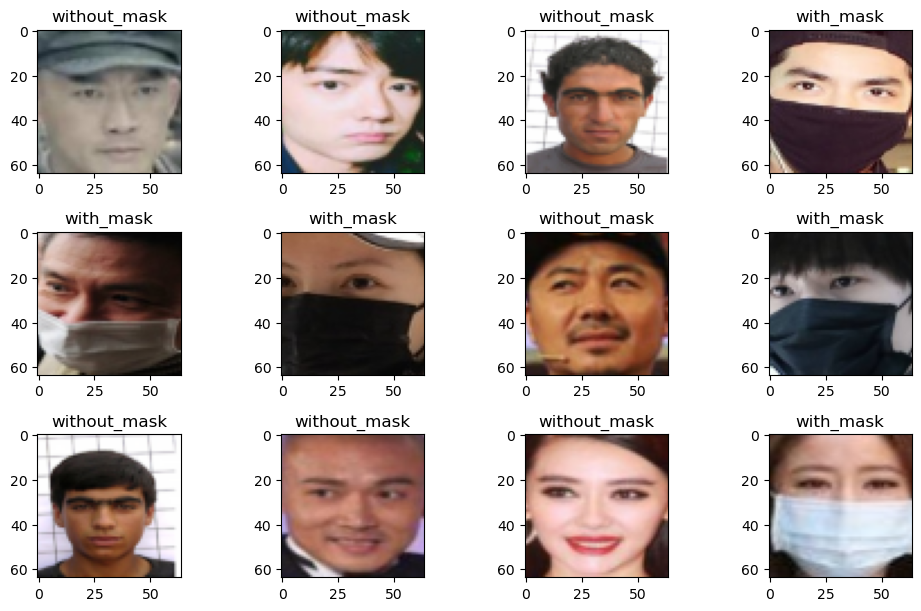

In [12]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

In [13]:
X = np.array(X)
y = np.array(labels)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [15]:
X_train.shape

(2790, 64, 64, 3)

In [16]:
y_train.shape

(2790,)

In [17]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

C:\Users\smart\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,690 (1.55 MB)

 Trainable params: 406,690 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.1,batch_size=32)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6751 - loss: 0.5937 - val_accuracy: 0.8889 - val_loss: 0.3007
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9154 - loss: 0.2284 - val_accuracy: 0.9140 - val_loss: 0.2084
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9409 - loss: 0.1700 - val_accuracy: 0.9283 - val_loss: 0.1800
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9629 - loss: 0.1221 - val_accuracy: 0.9247 - val_loss: 0.1820
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9556 - loss: 0.1216 - val_accuracy: 0.9283 - val_loss: 0.1709
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9570 - loss: 0.1100 - val_accuracy: 0.9355 - val_loss: 0.1483
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9639 - loss: 0.0991 - val_accuracy: 0.9391 - val_loss: 0.1446
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9708 - loss: 0.0809 - val_accuracy: 0.9355 - v

In [21]:
model.evaluate(X_train, y_train)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9943 - loss: 0.0267


[0.04554881900548935, 0.9881720542907715]

In [22]:
y_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [23]:
pred=[np.argmax(i) for i in y_pred]

In [24]:
accuracy_score(y_test,pred)

0.9627507163323782

<Axes: >

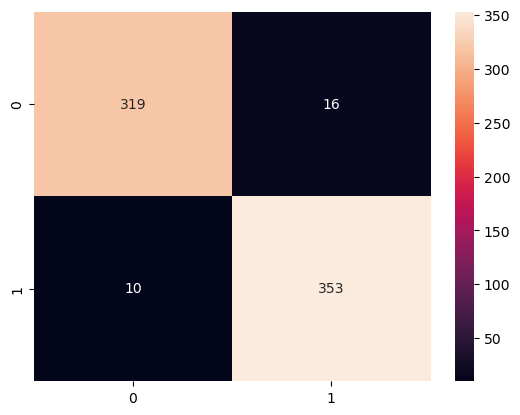

In [25]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt = 'd')

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       335
           1       0.96      0.97      0.96       363

    accuracy                           0.96       698
   macro avg       0.96      0.96      0.96       698
weighted avg       0.96      0.96      0.96       698

